# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Vitor Liu </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df.loc[(df.Latitude < 0), "Hemisfério"] = "Sul"
df.loc[(df.Latitude > 0), "Hemisfério"] = "Norte"

df[["Latitude","Hemisfério"]].head()

,Latitude,Hemisfério
0,19.246,Norte
1,1.863,Norte
2,-20.579,Sul
3,-59.076,Sul
4,11.938,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

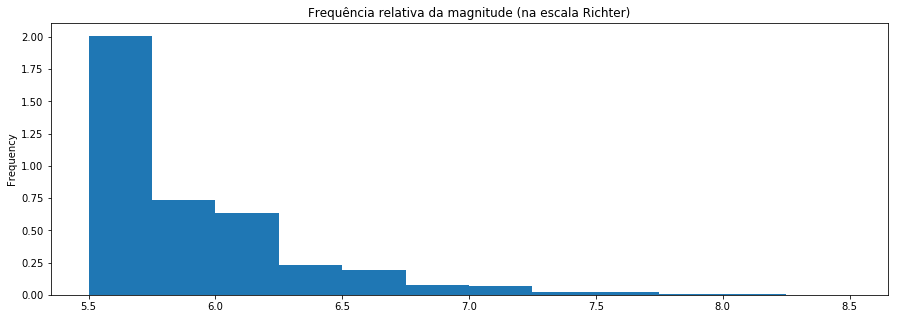

In [5]:
df["Magnitude"].plot(kind="hist", bins=[5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5], figsize=(15,5), normed=True, title="Frequência relativa da magnitude (na escala Richter)")

O histograma mostra claramente que a maioria dos terremotos (aprox. 70%, equivalente a 16000 terremotos) são de magnitude de 5.5 até 6, sendo esses considerados como terremotos Moderados.

Já os terremos Fortes, que têm magnitude de valor 6 até 7, compõem por volta de 20% dos registros, equivalente a 4680 terremotos.

Os terremotos Grandes, que têm magnitude de valor 7 até 8, tem poder de provocar danos graves em largas áreas. Cerca de 2%, ou 460 terremotos, dos valores registrados são terremotos Grandes.

Por fim, com valores de magnitude 8 até 9, os terremotos Importatnes constituem menos de 0.2%, felizmente.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

No caso de uma distribuição exponencial, o loc, que é o  

In [6]:
mu,sigma = expon.fit(df["Magnitude"])
print("loc = {}, scale = {}".format(mu,sigma))

loc = 5.499999999671081, scale = 0.3825486488509098


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

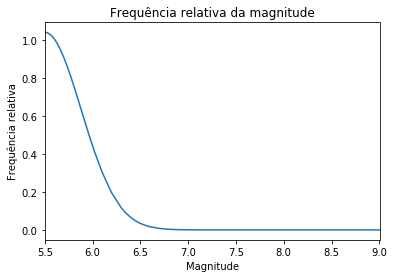

In [7]:
x = sorted(df["Magnitude"])
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma))
plt.xlim((5.5,9))
plt.xlabel("Magnitude")
plt.ylabel("Frequência relativa")
plt.title("Frequência relativa da magnitude")

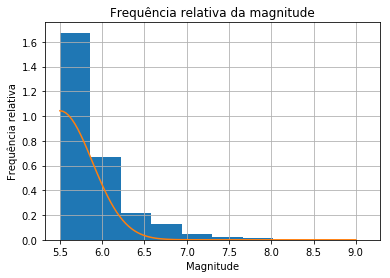

In [27]:
plt.figure()
pd.Series(df["Magnitude"].hist(normed=True))
x = np.linspace(5.5,9,100)
pdf_x = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, pdf_x)
plt.title("Frequência relativa da magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Frequência relativa")

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
pd.crosstab(df["Hemisfério"], df["Type"], normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
prob = len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Earthquake")])/len(df)

print("Probabilidade de ocorrer um terremoto no hemisfério Norte: {}, ou {}%".format(prob, prob*100))

Probabilidade de ocorrer um terremoto no hemisfério Norte: 0.4471211344609602, ou 44.71211344609602%


Explique o seu raciocínio

O espaço amostral é todos os registros do dataframe (len(df)). A quantidade de vezes que ocorreu um terremoto no hemisfério norte é len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Earthquake")], ou seja, a qauntidade em que o valor da coluna "Hemisfério" era "Norte" e o valor da coluna "Type" era de "Earthquake".

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [30]:
prob2 = len(df[(df["Hemisfério"]=="Norte") & (df["Type"]=="Nuclear Explosion")])/len(df[(df["Hemisfério"]=="Norte")])
print(len(df[(df["Hemisfério"]=="Norte")]))
print("Probabilidade de ter sido uma explosão nuclear no hemisfério Norte, dado que o registro foi no Norte: {}, ou {}%".format(prob2, prob2*100))

10617
Probabilidade de ter sido uma explosão nuclear no hemisfério Norte, dado que o registro foi no Norte: 0.013845719129697655, ou 1.3845719129697656%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

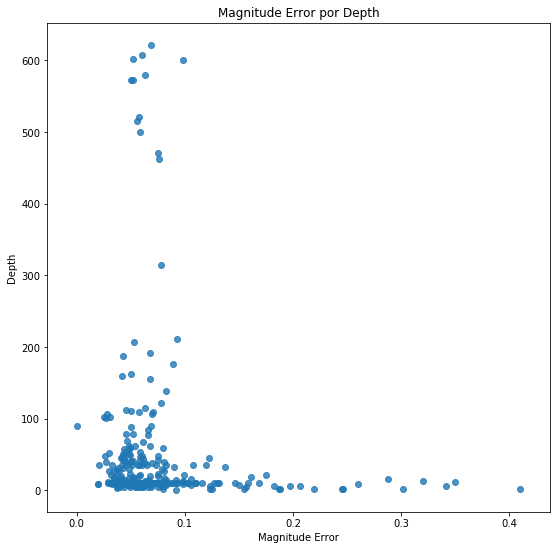

In [11]:
fig = plt.figure(figsize=(9, 9))
plt.scatter(df["Magnitude Error"], df["Depth"], alpha=0.8)
plt.title('Magnitude Error por Depth')
plt.xlabel('Magnitude Error')
plt.ylabel('Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
df["Magnitude Error"].corr(df["Depth"])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor negativo da correlação indica uma proporcionalidade negativa entre as variáveis `Magnitude Error` e `Depth`. Já o valor de 0.076918438923387206 indica que há pouco relação entre as variáveis, pois é um valor distante de 1.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [13]:
df["Longitude"].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

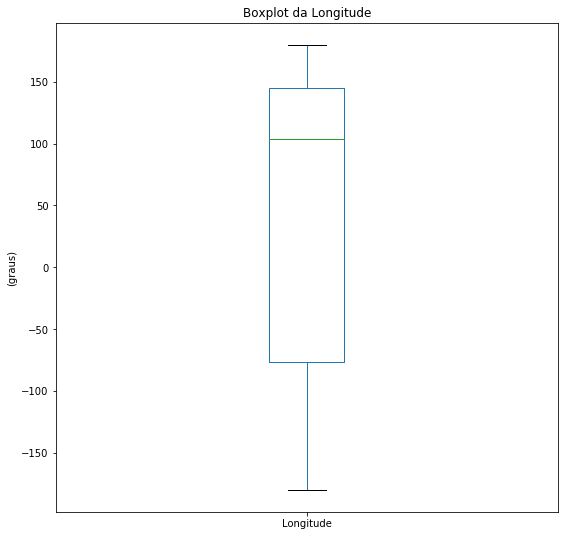

In [14]:
df["Longitude"].plot(kind="box", figsize=(9, 9), title="Boxplot da Longitude")
plt.ylabel("(graus)")

A mediana (50%) da longitude é 103.98° Norte (103.98). Ela é repesentada pela reta verde no boxplot.

O primeiro quartil (25%) e o terceiro quartil (75%) tem os respectivos valores de 76.34° Sul (-76.34) e 145.02° Norte (145.02).

O boxplot mostra que a distribuição há uma assimetria negativa notável, pois a caixa está um pouco mais próxima do canto superior do gráfico, e sua mediana está mais próxima do terceiro quartil.

É possível notar que não há valores externos, ou seja, não há valor menor que Q1 (primeiro quartil) - 1.5Q (mediana), nem valores maiores que Q3 (terceiro quartil) + 1.5Q .

In [15]:
df["Latitude"].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

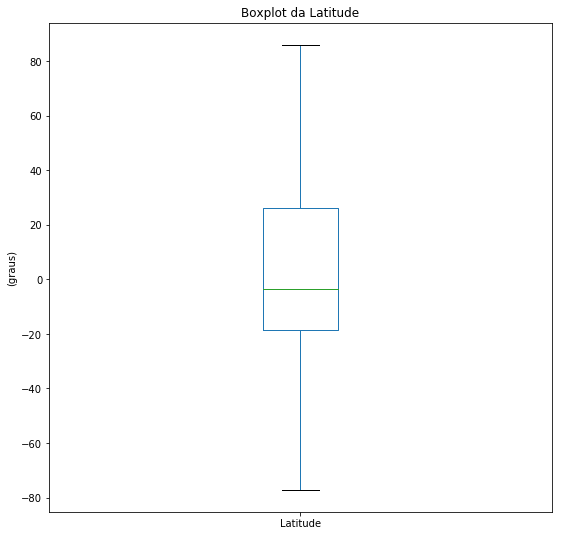

In [16]:
df["Latitude"].plot(kind="box", figsize=(9, 9), title="Boxplot da Latitude")
plt.ylabel("(graus)")

A mediana (50%) da latitude é 3.56° Oeste (-3.56). Ela é repesentada pela reta verde no boxplot.

O primeiro quartil (25%) e o terceiro quartil (75%) tem os respectivos valores de 18.65° Oeste (-18.65) e 26.19° Leste (26.19).

O boxplot mostra que há uma distribuição ligeiramente simétrica, pois a caixa está próxima do meio do gráfico, porém é claro que a mediana se aproxima mais do primeir quartil.

É possível notar que não há valores externos, ou seja, não há valor menor que Q1 (primeiro quartil) - 1.5Q (mediana), nem valores maiores que Q3 (terceiro quartil) + 1.5Q .

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [17]:
prob_sul = len(df[(df["Magnitude Type"]=="MB") & (df["Type"]=="Nuclear Explosion")])/len(df[df["Hemisfério"]=="Sul"])
prob_norte = len(df[(df["Magnitude Type"]=="MB") & (df["Type"]=="Nuclear Explosion")])/len(df[df["Hemisfério"]=="Norte"])
print("Probabilidade de Explosão Nuclear MB no Sul: {}%" .format(prob_sul*100))
print("Probabilidade de Explosão Nuclear MB no Norte: {}%" .format(prob_norte*100))

Probabilidade de Explosão Nuclear MB no Sul: 1.274034703767391%
Probabilidade de Explosão Nuclear MB no Norte: 1.5352736177828012%


A probabilidade de ocorrer abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion` é maior no Norte